In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dpe import DPE

The metadata file contains the labels and attributes for the dataset.

In [3]:
import pandas as pd
df = pd.read_csv('/scratch/ssd004/scratch/minht/datasets/waterbirds/metadata_waterbirds.csv')
df.head()

,id,filename,split,y,a
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,2,1,1
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,1
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,2,1,0
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,1
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,1


DPE is the main class for training and evaluating the DPE model.
fit method trains the model and returns a dictionary of metrics.

> DPE.help() lists all available parameters.

In [4]:
dpe = DPE(
    data_dir=r'/scratch/ssd004/scratch/minht/checkpoints/sd0/Waterbirds/13574640',
    metadata_path='/scratch/ssd004/scratch/minht/datasets/waterbirds/metadata_waterbirds.csv',
    num_stages=6,
    device='cuda',
    eval_freq=1,
    seed=0,
)

In [5]:
dpe.datasets['val'].feats.shape, dpe.datasets['test'].feats.shape

((1199, 2048), (5794, 2048))

In [6]:
metrics = dict()
metrics['DPE'] = dpe.fit()

[Stage 6]: 100%|██████████| 6/6 [00:17<00:00,  2.86s/it, wga=94.1, acc=95.7, bacc=95.3]


Predict proba returns a list of probabilities for each stage.

In [7]:
dpe.predict_proba(avg=False).shape

torch.Size([6, 5794, 2])

Average probabilities are also available, which is the average of all stages.

In [8]:
dpe.predict_proba(avg=True).shape

torch.Size([5794, 2])

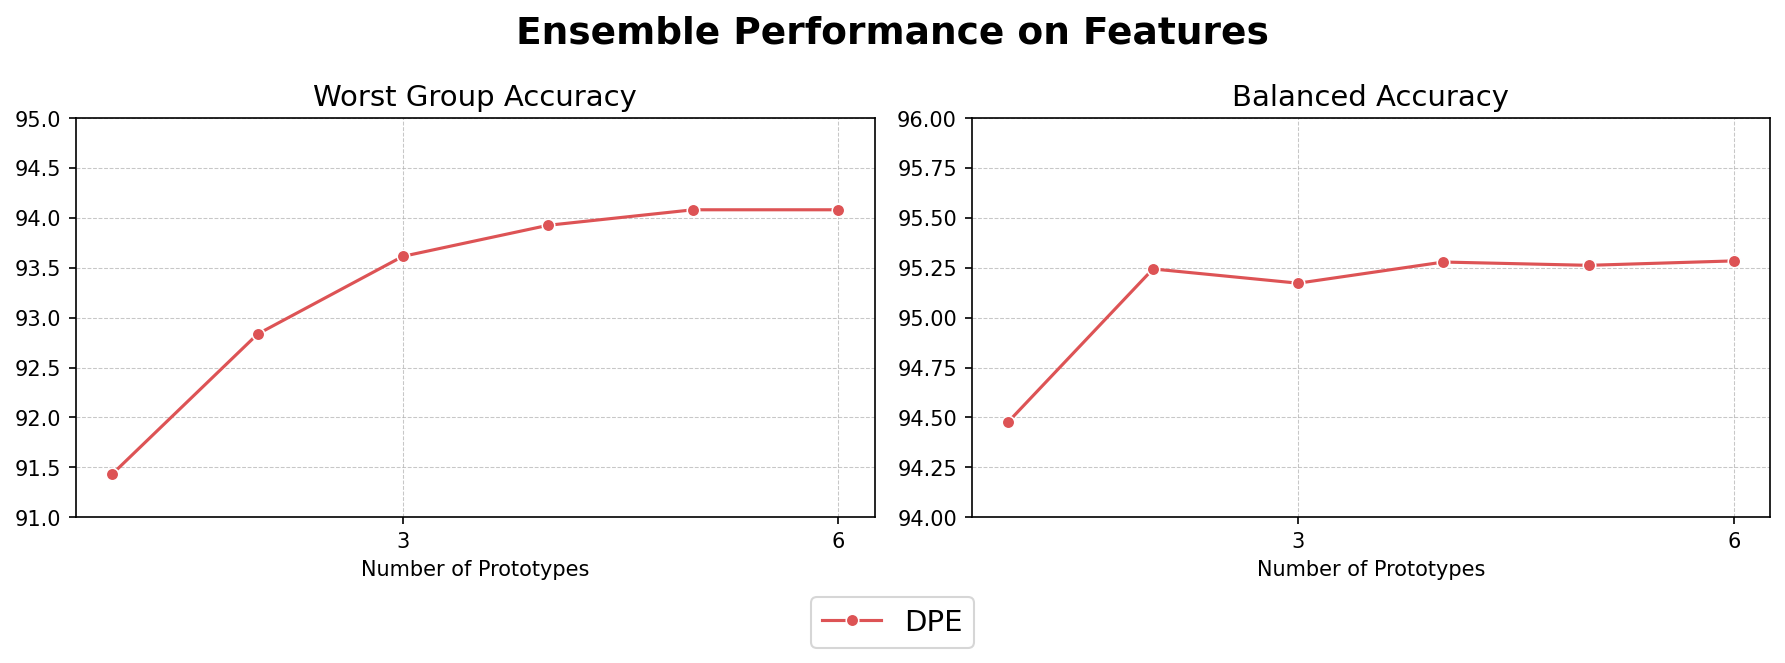

In [9]:
import pylab as plt
from dpe.plot_helpers import dict_to_df, plot_metrics

df = dict_to_df(metrics)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
plot_metrics(df, 'Worst Group Accuracy', axes[0], dataset_name=dpe.config.dataset_name)
plot_metrics(df, 'Balanced Accuracy', axes[1], show_legend=True, dataset_name=dpe.config.dataset_name)

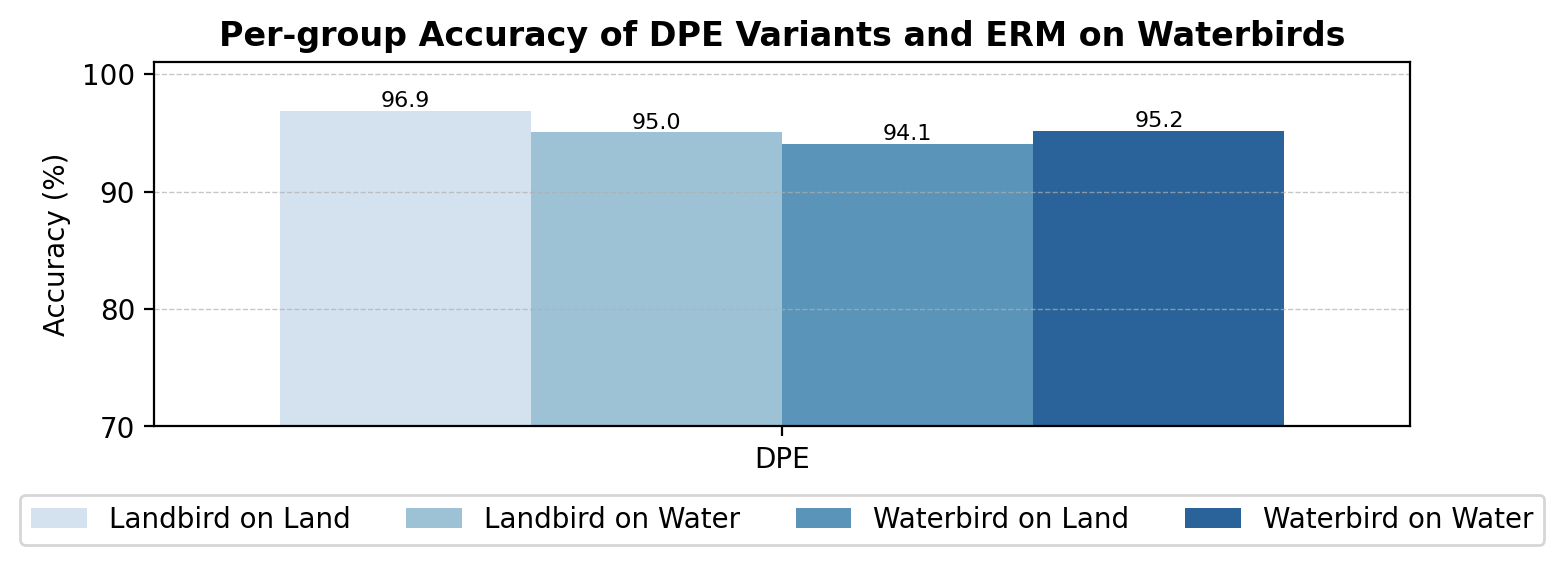

In [10]:
from dpe.plot_helpers import plot_per_group_accuracy
groups_dict = {'00': 'Landbird on Land', '01': 'Landbird on Water', '10': 'Waterbird on Land',
               '11': 'Waterbird on Water'}
plot_per_group_accuracy(metrics, groups_dict, title='Per-group Accuracy of DPE Variants and ERM on Waterbirds',
                        figsize=(8, 3))

In [11]:
dpe.evaluate()

{'overall': {'accuracy': 0.9565067311011392,
  'n_samples': 5794,
  'TN': 4327,
  'FN': 69,
  'TP': 1215,
  'FP': 183,
  'error': 252,
  'TPR': 0.9462616822429907,
  'FNR': 0.053738317757009345,
  'FPR': 0.04057649667405765,
  'TNR': 0.9594235033259424,
  'pred_prevalence': 0.2412840869865378,
  'prevalence': 0.22160856057991024,
  'balanced_acc': 0.9528425927844666,
  'AUROC_ovo': 0.9889606689184989,
  'BCE': 0.6162482658463795,
  'ECE': 0.4150112044216643,
  'AUROC': 0.9889606689184989,
  'AUPRC': 0.9716286837934633,
  'brier': 0.21168839963732106,
  'macro_avg': {'precision': 0.9267013125471069,
   'recall': 0.9528425927844666,
   'f1-score': 0.9388723686768743,
   'support': 5794.0},
  'weighted_avg': {'precision': 0.9587734540598848,
   'recall': 0.9565067311011392,
   'f1-score': 0.9571527199560126,
   'support': 5794.0}},
 'per_attribute': {0: {'accuracy': 0.9623748705557473,
   'n_samples': 2897,
   'TN': 2184,
   'FN': 38,
   'TP': 604,
   'FP': 71,
   'error': 109,
   'TPR': 